# Data Incubator Project - Exploratory Data Analysis, Code + Plots

In [1]:
import pandas as pd
import numpy as np
pd.set_option('precision', 10)

# define the data files
construc_costs_healthcare_projects_data = "Project_Data/ca-oshpd-construction-healthcare_projects.csv"
population_data = "Project_Data/CA_pop_1970_2050.csv"
hospital_utilization_data = "Project_Data/Year_by_Hospital Bed Utilization.csv"
phys_per_residents_data = "Project_Data/All Physicians per 100,000 Residents_2011_CA.csv"

# read in the data
construction_costs_df = pd.read_csv(construc_costs_healthcare_projects_data)
population_data_df = pd.read_csv(population_data)
hospital_util_data_df = pd.read_csv(hospital_utilization_data)
phys_per_residents_df = pd.read_csv(phys_per_residents_data)

### Data Preprocessing 

In [2]:
construction_costs_df.head()

,County,Data Generation Date,OSHPD Project Status,Total Costs of OSHPD Projects,Number of OSHPD Projects,Collection of Counties
0,01 - Alameda,9/30/2013,In Review,"$43,814,315.00",44,Bay Area Counties
1,01 - Alameda,9/30/2013,Pending Construction,"$840,182,510.04",126,Bay Area Counties
2,01 - Alameda,9/30/2013,In Construction,"$994,352,932.29",181,Bay Area Counties
3,01 - Alameda,9/30/2013,In Closure,"$65,255,928.88",81,Bay Area Counties
4,02 - Alpine,9/30/2013,In Review,$0.00,0,NaN


In [3]:
# rename columns to be easier to work with
construction_costs_df.columns = ['County','Date','Project Status','Total Cost','Number of Projects','Collection of Counties']
construction_costs_df.head()

,County,Date,Project Status,Total Cost,Number of Projects,Collection of Counties
0,01 - Alameda,9/30/2013,In Review,"$43,814,315.00",44,Bay Area Counties
1,01 - Alameda,9/30/2013,Pending Construction,"$840,182,510.04",126,Bay Area Counties
2,01 - Alameda,9/30/2013,In Construction,"$994,352,932.29",181,Bay Area Counties
3,01 - Alameda,9/30/2013,In Closure,"$65,255,928.88",81,Bay Area Counties
4,02 - Alpine,9/30/2013,In Review,$0.00,0,NaN


In [4]:
# convert date to date-time object
construction_costs_df['Date'] = pd.to_datetime(
    construction_costs_df['Date'])#.apply(lambda x: x.date())
construction_costs_df.head()

,County,Date,Project Status,Total Cost,Number of Projects,Collection of Counties
0,01 - Alameda,2013-09-30,In Review,"$43,814,315.00",44,Bay Area Counties
1,01 - Alameda,2013-09-30,Pending Construction,"$840,182,510.04",126,Bay Area Counties
2,01 - Alameda,2013-09-30,In Construction,"$994,352,932.29",181,Bay Area Counties
3,01 - Alameda,2013-09-30,In Closure,"$65,255,928.88",81,Bay Area Counties
4,02 - Alpine,2013-09-30,In Review,$0.00,0,NaN


In [5]:
# Split county string so one part is county name and other part is unique county ID
construction_costs_df['County ID'] = construction_costs_df['County'].str.split(' - ').str[0].astype('int')
construction_costs_df['County'] = construction_costs_df['County'].str.split(' - ').str[-1]

In [6]:
construction_costs_df.head()

,County,Date,Project Status,Total Cost,Number of Projects,Collection of Counties,County ID
0,Alameda,2013-09-30,In Review,"$43,814,315.00",44,Bay Area Counties,1
1,Alameda,2013-09-30,Pending Construction,"$840,182,510.04",126,Bay Area Counties,1
2,Alameda,2013-09-30,In Construction,"$994,352,932.29",181,Bay Area Counties,1
3,Alameda,2013-09-30,In Closure,"$65,255,928.88",81,Bay Area Counties,1
4,Alpine,2013-09-30,In Review,$0.00,0,NaN,2


In [7]:
# format cost so it's a numeric and can be manipulated (summed, avged, etc...) later
cost_v = construction_costs_df[
    construction_costs_df.columns[3]].replace('[\$,]', '', regex=True).astype('float')
construction_costs_df['Total Cost'] = cost_v
construction_costs_df.head()

,County,Date,Project Status,Total Cost,Number of Projects,Collection of Counties,County ID
0,Alameda,2013-09-30,In Review,4.3814315000e+07,44,Bay Area Counties,1
1,Alameda,2013-09-30,Pending Construction,8.4018251004e+08,126,Bay Area Counties,1
2,Alameda,2013-09-30,In Construction,9.9435293229e+08,181,Bay Area Counties,1
3,Alameda,2013-09-30,In Closure,6.5255928880e+07,81,Bay Area Counties,1
4,Alpine,2013-09-30,In Review,0.0000000000e+00,0,NaN,2


In [8]:
group1 = construction_costs_df.groupby(
    ['County', 'County ID', 'Date'])[
    'Total Cost', 'Number of Projects'].sum()  #here we sum over all project statuses

group1.columns = ['Total Cost Over All Phases', 'Number of Projects']
group1.index.name = 'Date' #now convert this back into a multi column dataframe, convert row names to its own column
group1.reset_index(inplace=True)

group1.head()

,County,County ID,Date,Total Cost Over All Phases,Number of Projects
0,Alameda,1,2013-09-30,1.9436056862e+09,432
1,Alameda,1,2013-10-08,1.9436161862e+09,431
2,Alameda,1,2013-10-31,1.9432119978e+09,429
3,Alameda,1,2013-11-14,1.9855250927e+09,426
4,Alameda,1,2013-11-26,1.9779279857e+09,418


In [9]:
# create new dfs to store total costs for each county, num projects for each county
total_costs_df = pd.DataFrame(columns = ['Date'])
total_costs_df['Date'] = group1['Date'].unique()
num_proj_df = pd.DataFrame(columns = ['Date'])
num_proj_df['Date'] = group1['Date'].unique()

In [10]:
county_ids = group1['County ID'].unique()
for i in county_ids: 
    #print(i)
    # generate a new dataframe w/ only values from current county
    curr_county_cost_df = group1.loc[(group1['County ID'] == i), ['Date', 'Total Cost Over All Phases']]
    curr_county_proj_df = group1.loc[(group1['County ID'] == i), ['Date', 'Number of Projects']]
    # at each iteration keep adding to total_costs_df and num_proj_df, each county is a new column of values
    total_costs_df = pd.merge(total_costs_df, curr_county_cost_df, on='Date', how='inner')
    total_costs_df.columns.values[i] = str(i)
    #total_costs_df.rename(columns={ total_costs_df.columns[i]: str(i) })
    num_proj_df = pd.merge(num_proj_df, curr_county_proj_df, on='Date', how='inner')
    num_proj_df.columns.values[i] = str(i)

In [11]:
num_proj_df.head()

,Date,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,2013-09-30,432,0,11,37,3,3,147,6,17,...,102,124,10,12,5,61,25,189,18,13
1,2013-10-08,431,0,11,38,3,3,146,6,17,...,101,124,9,12,5,62,25,189,18,13
2,2013-10-31,429,0,11,38,4,3,146,6,17,...,99,114,9,12,5,59,23,198,19,14
3,2013-11-14,426,0,11,38,4,3,147,6,17,...,100,110,9,12,5,58,23,201,19,15
4,2013-11-26,418,0,11,40,4,3,152,6,17,...,101,110,9,12,5,52,22,206,19,15


In [12]:
#construc_costs_healthcare_projects_df = construc_costs_healthcare_projects_df.groupby(
   # [construc_costs_healthcare_projects_df['Date'].dt.strftime('%b %Y'),'County']).sum().reset_index()
#df = construction_costs_df
#df = df.set_index('Date')
#df = df.groupby(['County', pd.Grouper(freq="M")]).mean().reset_index()

In [13]:
total_costs_df['Average'] = total_costs_df.mean(axis=1) #calculate averages across all counties
num_proj_df['Average'] = num_proj_df.mean(axis=1)

## Plots

### Plotting time series of total construction costs in healthcare (summed across all OSHPD project phases), for each CA county, in addition to the average across all counties

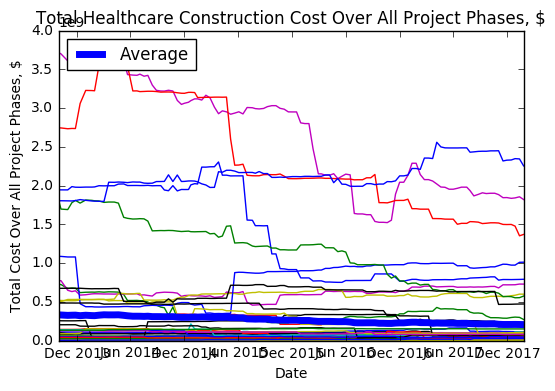

In [14]:
# Plot!
import matplotlib.pyplot as plt
x = total_costs_df['Date']
y = total_costs_df.drop(['Date', 'Average'], axis = 1)
y_avg = total_costs_df['Average']
plt.plot(x, y)
plt.plot(x, y_avg, color='blue', linewidth=5, label = 'Average')
plt.ylabel("Total Cost Over All Project Phases, $")
plt.xlabel('Date')
plt.title('Total Healthcare Construction Cost Over All Project Phases, $')
plt.legend(loc='upper left')
plt.show()

Fig. 1. The plot shows trends in health care construction spending across time, for individual counties (left unlabelled on the plot for space/clarity), and the average over counties (thick blue line). As expected, some counties (at first glance, the more populous, wealthy ones that include the biggest CA cities) outspend other counties by orders of magnitude, and dominate the graph. I was expecting that the trend would be upward given the ballooning cost of healthcare in general, but that doesn't seem to be the case here, perhaps because constructon in healthcare is affected by overall infrastructure spending despite being at the intersection of construction and health industries? It would be interesting to look into infrastructure spending in CA over the last couple of years, and see whether it also has a general downward trend to correlate with the plot's general behavior (although from personal and anecdotal experience I would guess not, but my perception may be skewed by location, etc...). 

It is also interesting to observe how abrupt some of the changes in spending are at certain timepoints. Part of the future aspects of my project would be to determine major changepoints and hypothesize what might have occurred at those times to cause such abrupt changes. For example, it would be useful to plot this information against longitudinal data about county budgets and finances, or make note of any changes in policy during the relevant time period.

In [15]:
x = num_proj_df['Date']
y = num_proj_df.drop(['Date', 'Average'], axis = 1)
y_avg = num_proj_df['Average']
plt.plot(x, y)
plt.plot(x, y_avg, color='blue', linewidth=5)
plt.ylabel("Total Number of Projects Across All Phases")
plt.xlabel('Date')
plt.figure(figsize=(100,100))
#plt.show() #not that interesting, suppress output for now

In [16]:
construction_costs_df.head()

,County,Date,Project Status,Total Cost,Number of Projects,Collection of Counties,County ID
0,Alameda,2013-09-30,In Review,4.3814315000e+07,44,Bay Area Counties,1
1,Alameda,2013-09-30,Pending Construction,8.4018251004e+08,126,Bay Area Counties,1
2,Alameda,2013-09-30,In Construction,9.9435293229e+08,181,Bay Area Counties,1
3,Alameda,2013-09-30,In Closure,6.5255928880e+07,81,Bay Area Counties,1
4,Alpine,2013-09-30,In Review,0.0000000000e+00,0,NaN,2


In [17]:
group2 = construction_costs_df.groupby( #group by collection project status/phas
    ['Project Status', 'Date'])[
    'Total Cost', 'Number of Projects'].sum()  #here we sum over all counties

group2.columns = ['Total Cost Over All Counties', 'Number of Projects']

group2.index.name = 'Date' #now convert this back into a multi column dataframe, convert row names to its own column
group2.reset_index(inplace=True)

group2.head()

,Project Status,Date,Total Cost Over All Counties,Number of Projects
0,In Closure,2013-09-30,2.9838591512e+09,2247
1,In Closure,2013-10-08,2.9224995921e+09,2277
2,In Closure,2013-10-31,2.7791735447e+09,2250
3,In Closure,2013-11-14,2.8399795993e+09,2248
4,In Closure,2013-11-26,2.9172962212e+09,2257


In [18]:
proj_status_total_costs_df = pd.DataFrame(columns = ['Date'])
proj_status_total_costs_df['Date'] = group2['Date'].unique()
proj_status_num_proj_df = pd.DataFrame(columns = ['Date'])
proj_status_num_proj_df['Date'] = group2['Date'].unique()

In [19]:
status_ids = group2['Project Status'].unique()
for idx, val in enumerate(status_ids):
    #print(val)
    # generate a new dataframe w/ only values from current status phase
    curr_status_cost_df = group2.loc[(group2['Project Status'] == val), ['Date', 'Total Cost Over All Counties']]
    curr_status_num_proj_df = group2.loc[(group2['Project Status'] == val), ['Date', 'Number of Projects']]
    # at each iteration keep adding to proj_status_total_costs_df and proj_status_num_proj_df, each project status is a new column of values
    proj_status_total_costs_df = pd.merge(proj_status_total_costs_df, curr_status_cost_df, on='Date', how='inner')
    proj_status_total_costs_df.columns.values[idx+1] = val
    #total_costs_df.rename(columns={ total_costs_df.columns[i]: str(i) })
    proj_status_num_proj_df = pd.merge(proj_status_num_proj_df, curr_status_num_proj_df, on='Date', how='inner')
    proj_status_num_proj_df.columns.values[idx+1] = val

In [20]:
proj_status_num_proj_df.head()

,Date,In Closure,In Construction,In Review,Pending Construction
0,2013-09-30,2247,2893,1423,1625
1,2013-10-08,2277,2851,1412,1616
2,2013-10-31,2250,2858,1346,1507
3,2013-11-14,2248,2856,1343,1513
4,2013-11-26,2257,2850,1362,1501


### Plotting time series of total construction costs in healthcare (summed across all counties), for each OSHPD project phase

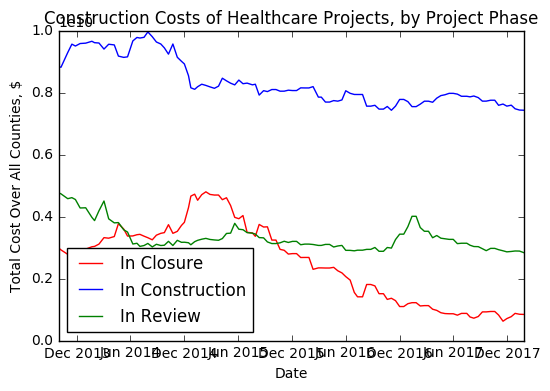

In [32]:
# Plot!
import matplotlib.pyplot as plt
x = proj_status_total_costs_df['Date']
y1 = proj_status_total_costs_df['In Closure']
y2 = proj_status_total_costs_df['In Construction']
y3 = proj_status_total_costs_df['In Review']
plt.plot(x, y1, color = 'red', label = 'In Closure')
plt.plot(x, y2, color = 'blue', label = 'In Construction')
plt.plot(x, y3, color = 'green', label = 'In Review')
#plt.plot(x, y4, color = 'black', linewidth=5, label = 'Pending Construction')
plt.ylabel("Total Cost Over All Counties, $")
plt.xlabel('Date')
plt.title('Construction Costs of Healthcare Projects, by Project Phase')
plt.legend(loc='lower left')
plt.show()

Fig. 2. Graph shows total cost of all projects (summed over all counties), in each phase. As expected, more money is invested during a project while in construction, and less when it is in review or closure phases. There is a general downward trend in spending among all phases, except for an uptick for projects in closure in 2014. The general downward trend makes sense considering the general downward trend in overall spending among the various counties (Fig. 1).

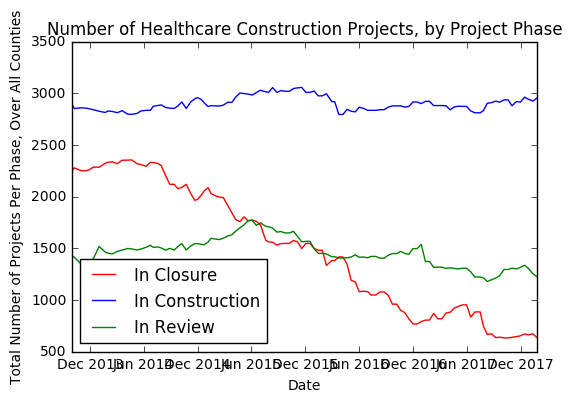

In [22]:
# Plot!
import matplotlib.pyplot as plt
x = proj_status_num_proj_df['Date']
y1 = proj_status_num_proj_df['In Closure']
y2 = proj_status_num_proj_df['In Construction']
y3 = proj_status_num_proj_df['In Review']
#y4 = proj_status_num_proj_df['Pending Construction']
plt.plot(x, y1, color = 'red', label = 'In Closure')
plt.plot(x, y2, color = 'blue', label = 'In Construction')
plt.plot(x, y3, color = 'green', label = 'In Review')
#plt.plot(x, y4, color = 'black', linewidth=5, label = 'Pending Construction')
plt.ylabel("Total Number of Projects Per Phase, Over All Counties")
plt.xlabel('Date')
plt.title('Number of Healthcare Construction Projects, by Project Phase')
plt.legend(loc='lower left')
plt.show()

Fig. 3 represents the number of healthcare projects in the state of California, from 2013 to 2017. What is interesting is that the number of projects in construction and review phase stay roughly constant over the time, despite overall downward trends in spending. Does this mean that individual projects are being alloted less money over time? And finally, the number of projects in closure phase, is decreasing across the time period, while the number of projects in the other phases, remain roughly constant. This suggests that fewer and fewer projects are being completed as time passes. One reason could be that as time progresses, the scope and scale of projects becomes bigger, and thus take longer to complete, leading to less completions per time period. 

### Consider population and other factors across same time period...

In [33]:
############### Now consider population data and hospital utilization
population_data_df = pd.read_csv(population_data)
hospital_util_data_df = pd.read_csv(hospital_utilization_data) #just by data inspection, 
    #at first glance the general trend is linear, flat, not interesting to look at this point, may need to get higher resolution data
phys_per_residents_df = pd.read_csv(phys_per_residents_data) #not high enough time resolution

population_data_df.head()
population_data_df.columns = ['fips','County','Year','Age','Female Pop','Male Pop', 'Total Population']
#population_data_df['Year'] = pd.to_datetime(
 #   population_data_df['Year']).apply(lambda x: x.date())
population_data_df.head()
#hospital_util_data_df.head()
#phys_per_capita_df.head()

,fips,County,Year,Age,Female Pop,Male Pop,Total Population
0,6001,ALAMEDA,1970,0,8533,8671,17204
1,6001,ALAMEDA,1970,1,8151,8252,16403
2,6001,ALAMEDA,1970,2,7753,8015,15768
3,6001,ALAMEDA,1970,3,8018,8412,16430
4,6001,ALAMEDA,1970,4,8551,8648,17199


In [34]:
total_pop = population_data_df.groupby(['County', 'Year'])['Total Population'].sum()
total_pop = total_pop.to_frame()
total_pop.columns = ['Total Population']
total_pop.index.name = 'County' #now convert this back into a multi column dataframe, convert row names to its own column
total_pop.reset_index(inplace=True)

total_pop.head()

,County,Year,Total Population
0,ALAMEDA,1970,1072985
1,ALAMEDA,1971,1087697
2,ALAMEDA,1972,1098491
3,ALAMEDA,1973,1095003
4,ALAMEDA,1974,1098911


In [35]:
# create new df to store total pop for each county
total_pop_df = pd.DataFrame(columns = ['Year'])
total_pop_df['Year'] = total_pop['Year'].unique()
county_ids = total_pop['County'].unique()  #get list of unique county names

In [36]:
for idx, val in enumerate(county_ids):
    #print(idx)
    # generate a new dataframe w/ only values from current county
    curr_county_pop = total_pop.loc[(total_pop['County'] == val), ['Year', 'Total Population']]
    # at each iteration keep adding to total_costs_df and num_proj_df, each county is a new column of values
    total_pop_df = pd.merge(total_pop_df, curr_county_pop, on='Year', how='inner')
    total_pop_df.columns.values[idx+1] = val
    #total_costs_df.rename(columns={ total_costs_df.columns[i]: str(i) })
total_pop_df.head()

,Year,ALAMEDA,ALPINE,AMADOR,BUTTE,CALAVERAS,COLUSA,CONTRA COSTA,DEL NORTE,EL DORADO,...,SONOMA,STANISLAUS,SUTTER,TEHAMA,TRINITY,TULARE,TUOLUMNE,VENTURA,YOLO,YUBA
0,1970,1072985,506,11900,102530,13716,12372,557484,14590,44109,...,206488,195783,42062,29566,7562,189397,22301,381354,92655,44365
1,1971,1087697,589,12785,106001,13805,12309,567708,15085,47204,...,214302,201711,42880,30209,7884,195203,23012,394112,93617,45300
2,1972,1098491,584,12891,110397,14307,12307,572096,15309,49897,...,224220,208099,43490,30509,8471,200505,23798,406307,95895,45288
3,1973,1095003,686,13896,113803,14820,12312,576222,15496,52689,...,234714,213106,44805,31086,8877,204817,24725,417900,96819,44802
4,1974,1098911,677,14984,118101,15410,12599,579607,16009,56074,...,243703,219627,45415,32116,9422,210322,25194,428303,98718,43811


In [37]:
# select only relevant years to match with the spending data we've looked at above (2013-current)
pop_df_relevant = total_pop_df.loc[(total_pop_df['Year'] >=2013) &
                                   (total_pop_df['Year'] <=2018)]
pop_df_relevant.head()

,Year,ALAMEDA,ALPINE,AMADOR,BUTTE,CALAVERAS,COLUSA,CONTRA COSTA,DEL NORTE,EL DORADO,...,SONOMA,STANISLAUS,SUTTER,TEHAMA,TRINITY,TULARE,TUOLUMNE,VENTURA,YOLO,YUBA
43,2013,1575797,1164,37582,222229,45116,21972,1089656,27543,182280,...,494416,527687,96540,63731,13667,455854,54894,842639,208194,74352
44,2014,1599685,1163,37447,223899,45009,22139,1102941,27235,182547,...,497908,531720,97101,63845,13613,459831,54683,847885,209834,74975
45,2015,1619679,1157,37314,224363,44899,22271,1116882,27119,183140,...,501182,538372,97618,63970,13562,463291,54525,852013,212686,75579
46,2016,1637712,1148,37191,225125,44791,22408,1129894,27040,184180,...,503953,545008,98191,64098,13482,468235,54282,854383,216866,76129
47,2017,1655752,1143,37267,226478,44818,22612,1143494,27063,185090,...,507323,551712,98992,64313,13447,473308,54193,858585,220171,76904


In [38]:
x = pop_df_relevant['Year']
pop_df_relevant = pop_df_relevant.drop(['Year'], axis = 1)
pop_df_relevant['Average'] = pop_df_relevant.mean(axis=1) #calculate averages across all counties
pop_df_relevant

,ALAMEDA,ALPINE,AMADOR,BUTTE,CALAVERAS,COLUSA,CONTRA COSTA,DEL NORTE,EL DORADO,FRESNO,...,STANISLAUS,SUTTER,TEHAMA,TRINITY,TULARE,TUOLUMNE,VENTURA,YOLO,YUBA,Average
43,1575797,1164,37582,222229,45116,21972,1089656,27543,182280,959506,...,527687,96540,63731,13667,455854,54894,842639,208194,NaN,671913.7192982456
44,1599685,1163,37447,223899,45009,22139,1102941,27235,182547,969410,...,531720,97101,63845,13613,459831,54683,847885,209834,NaN,678323.4210526316
45,1619679,1157,37314,224363,44899,22271,1116882,27119,183140,979357,...,538372,97618,63970,13562,463291,54525,852013,212686,NaN,683933.8596491228
46,1637712,1148,37191,225125,44791,22408,1129894,27040,184180,989183,...,545008,98191,64098,13482,468235,54282,854383,216866,NaN,689093.0350877193
47,1655752,1143,37267,226478,44818,22612,1143494,27063,185090,999902,...,551712,98992,64313,13447,473308,54193,858585,220171,NaN,695030.2280701754
48,1673333,1138,37401,227812,44901,22800,1156897,27106,186199,1010872,...,558508,99800,64545,13416,478239,54137,862900,223448,NaN,700971.7543859649


In [39]:
# Plot!
x = x.as_matrix()
y = pop_df_relevant.drop(['Average'], axis = 1)
y_avg = pop_df_relevant['Average']
plt.plot(x, y)
plt.plot(x, y_avg, color='blue', linewidth=5)
plt.ylabel("Total Population")
plt.xlabel('Year')
#plt.show() #Nothing interesting about steadily increasing population trend, supress output for now. It can be interesting to couple this to geospatial county data

## A Final Note

Although my initial exploratory work includes additional plots, some of them aren't that interesting, so I've supressed their output for now and just left the interesting plots to render. Future project work will include geospatial plotting of data, with the help of additional graphing packages (Basemap or Kartograph) that need to be installed and configured properly first.